- LogisticRegression
  - penalty : 규제 (회귀의 Ridge, Lasso 역할), 'l1', 'l2', 'elasticnet' 등 설정가능, 기본 'l2'
  - C : 규제의 강도 (회귀 규제의 alpha), 정규화 강도의 역수, 값이 작을수록 더 강한 정규화가 이루어짐. 값은 로그스케일 (0.01, 0.1, 1, 10...)

In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(work_path)

from my_helper.regression import *
from my_helper.util import *
from my_helper.plot import *
from my_helper.analysis import *
from my_helper.classification import *
from yjk_module.preprocessing import *
from yjk_module.ml_module import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from statsmodels.formula.api import logit

In [2]:
df = pd.read_excel("./data/pima_indians_diabetes.xlsx")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
pp = YjkPreprocessor()
pp.set_strategy(outline = None)

아래와 같이 처리합니다.
+-------------+---------------+
| 범주        | 처리방법      |
|-------------+---------------|
| 이상치 처리 | 처리하지 않음 |
| 결측치 처리 | 중앙값 대체   |
| 스케일러    | 표준화        |
| 인코딩      | 원핫인코딩    |
+-------------+---------------+


In [7]:
X = df.copy()
Y = X.pop('Outcome')

In [8]:
X_p = pp.fit_transform(X)

데이터프레임 크기 : (768, 8)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], 총 8개


In [9]:
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.25, random_state = 0, stratify = Y)

In [10]:
model = LogisticRegression()

In [11]:
model.fit(x_train, y_train)

LogisticRegression()

- sklearn은 메서드 체인 방식으로 작성되어 있어서 (각 내장함수가 return self로 자신을 return함) model.fit과 fit = model.fit 두가지 방법을 사용할 수 있음

In [12]:
model.score(x_train, y_train), model.score(x_test, y_test)

(0.78125, 0.78125)

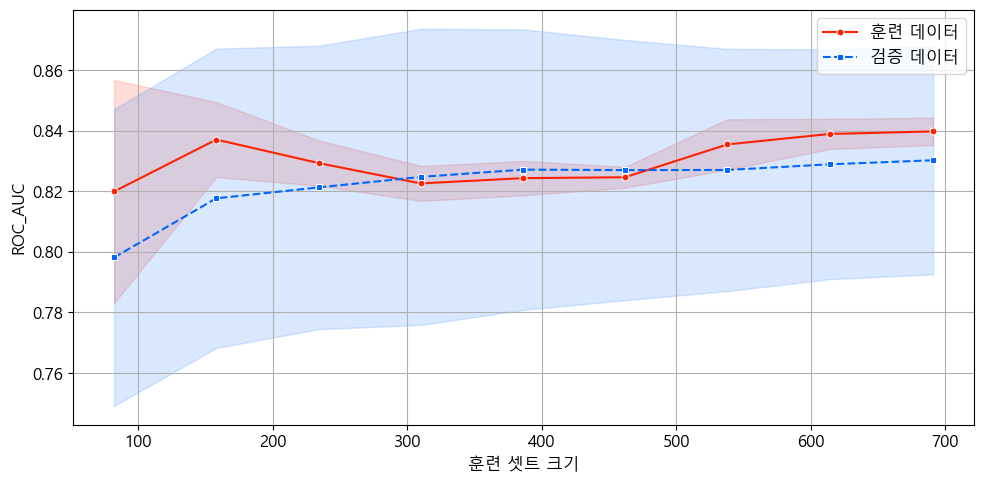

In [13]:
my_learing_curve(model, df, 'Outcome', True, dpi = 100, scoring = 'roc_auc')

In [14]:
params = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'C' : [0.001, 0.01, 0.1, 1, 10, 100]
}

In [15]:
model = LogisticRegression(n_jobs = -1)
grid = GridSearchCV(model, param_grid = params, cv = 10, n_jobs = -1)
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [16]:
grid.cv_results_['params'][:5]

[{'C': 0.001, 'penalty': 'l1'},
 {'C': 0.001, 'penalty': 'l2'},
 {'C': 0.001, 'penalty': 'elasticnet'},
 {'C': 0.001, 'penalty': None},
 {'C': 0.01, 'penalty': 'l1'}]

In [17]:
grid.cv_results_['mean_test_score']

array([       nan, 0.64927405,        nan, 0.76040532,        nan,
       0.74494858,        nan, 0.76040532,        nan, 0.76218996,
              nan, 0.76040532,        nan, 0.76215971,        nan,
       0.76040532,        nan, 0.76040532,        nan, 0.76040532,
              nan, 0.76040532,        nan, 0.76040532])

In [18]:
result_df = pd.DataFrame(grid.cv_results_['params'])
result_df['mean_test_score'] = grid.cv_results_['mean_test_score']
result_df = result_df.dropna(subset = 'mean_test_score').sort_values(by = 'mean_test_score', ascending = False)

In [19]:
result_df

,C,penalty,mean_test_score
9,0.100,l2,0.762190
13,1.000,l2,0.762160
3,0.001,None,0.760405
7,0.010,None,0.760405
11,0.100,None,0.760405
15,1.000,None,0.760405
17,10.000,l2,0.760405
19,10.000,None,0.760405
21,100.000,l2,0.760405
23,100.000,None,0.760405


In [20]:
best_estimator = grid.best_estimator_

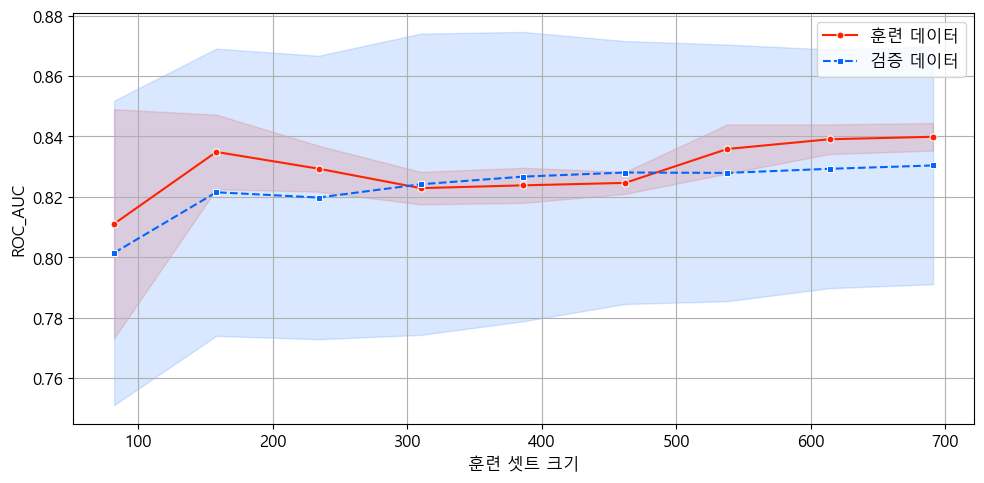

In [21]:
my_learing_curve(best_estimator, df, 'Outcome', True, dpi = 100, scoring = 'roc_auc')

In [22]:
check_li = df.columns[1:6]

In [23]:
check_li

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')

In [24]:
df2 = df.copy()
for i in check_li:
    cond = df[df[i] == 0]
    df.loc[cond.index, i] = np.nan

In [25]:
df2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
pp2 = YjkPreprocessor()
pp2.set_strategy(outline = None, null = 'mean')

아래와 같이 처리합니다.
+-------------+---------------+
| 범주        | 처리방법      |
|-------------+---------------|
| 이상치 처리 | 처리하지 않음 |
| 결측치 처리 | 평균값 대체   |
| 스케일러    | 표준화        |
| 인코딩      | 원핫인코딩    |
+-------------+---------------+


In [27]:
X = df2.copy()
Y = X.pop('Outcome')

In [28]:
X_p = pp2.fit_transform(X)

데이터프레임 크기 : (768, 8)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], 총 8개


In [29]:
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [30]:
model = LogisticRegression(n_jobs = -1)
grid = GridSearchCV(model, param_grid = params, cv = 10, n_jobs = -1)
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [31]:
result_df = pd.DataFrame(grid.cv_results_['params'])
result_df['mean_test_score'] = grid.cv_results_['mean_test_score']
result_df = result_df.dropna(subset = 'mean_test_score').sort_values(by = 'mean_test_score', ascending = False)

In [32]:
result_df

,C,penalty,mean_test_score
3,0.001,None,0.767107
7,0.010,None,0.767107
11,0.100,None,0.767107
13,1.000,l2,0.767107
15,1.000,None,0.767107
17,10.000,l2,0.767107
19,10.000,None,0.767107
21,100.000,l2,0.767107
23,100.000,None,0.767107
9,0.100,l2,0.765442


In [33]:
best_model = grid.best_estimator_

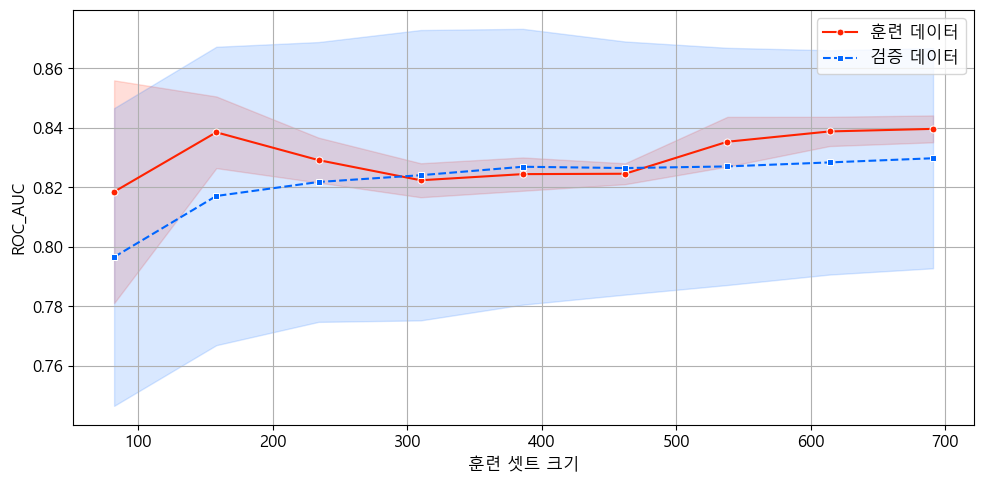

In [34]:
my_learing_curve(best_model, pd.concat([X_p, Y], axis = 1), yname = 'Outcome', dpi = 100, scoring = 'roc_auc', cv = 10)

In [35]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report

In [36]:
best_estimator.score(x_test, y_test)

0.7727272727272727

In [37]:
accuracy_score(y_test, best_estimator.predict(x_test))

0.7727272727272727

In [38]:
roc_auc_score(y_test, best_estimator.predict(x_test))

0.7185185185185187

In [39]:
roc_auc_score(y_test, best_estimator.predict_proba(x_test)[:, 1])

0.8796296296296297

In [40]:
print(classification_report(y_test, best_estimator.predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       100
           1       0.74      0.54      0.62        54

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



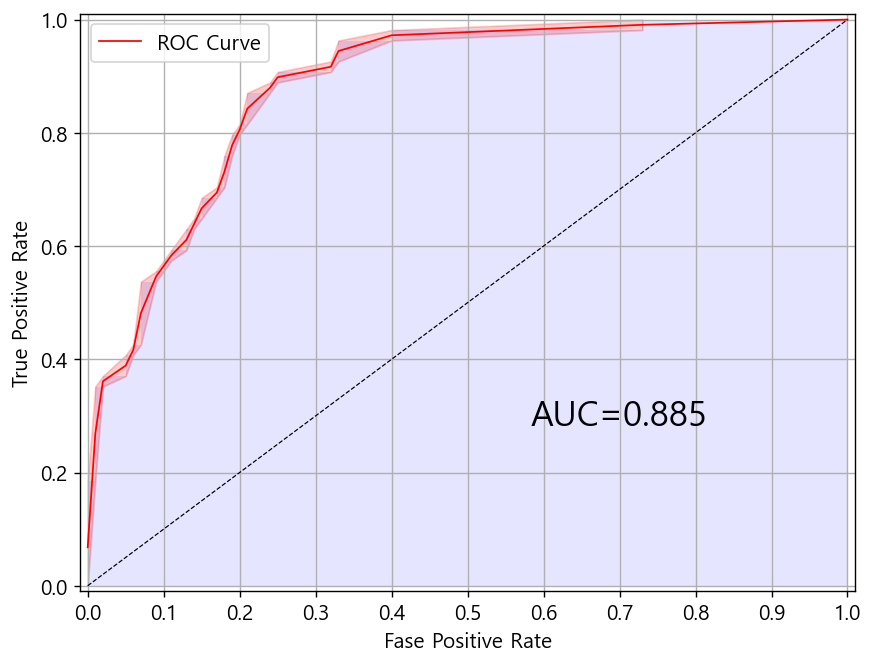

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6), dpi=125)
sb.lineplot(x=fpr, y=tpr, color='red', linewidth=1, label='ROC Curve')
plt.fill_between(fpr,tpr, facecolor='blue',alpha=0.1)
sb.lineplot(x=[0,1], y=[0,1], color='black', linestyle='--', linewidth=0.7)
plt.xlabel('Fase Positive Rate')
plt.ylabel('True Positive Rate')
plt.xticks(np.round(np.arange(0, 1.1, 0.1),2))
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)
plt.text(0.7,0.3, 'AUC=%0.3f' % roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1]), fontsize=20, ha='center', va='center')
plt.grid()
plt.show()
plt.close()

- 로지스틱 회귀는 어떤 사건이 발생할 확률을 회귀식으로 계산하는 것
    - 그 확률은 S형 곡선로 나타남 (시그모이드 함수)
- 로지스틱 회귀의 가정
    - 종속변수가 이분형
    - 독립변수가 범주형인 경우 인코딩된 더미변수 형태여야 함
    - 수치형 독립변수는 정규 분포를 따르는 것이 성능이 안정적임
    - 다중공선성 또한 최대한 배제하여야 함

- 혼동행렬
    - (T / F) (N / P)
    - T / F : 결과를 맞췄는지 여부
    - N / P : 무엇으로 예측했는지
        - TP : 긍정으로 예측했으며 실제 긍정인 것을 맞춤

In [42]:
model = my_logistic_classification(x_train, y_train, x_test, y_test)

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  9 |   0.1 | l2        |          0.770412 |
|  3 | 0.001 |           |          0.768772 |
|  7 |  0.01 |           |          0.768772 |
| 11 |   0.1 |           |          0.768772 |
| 13 |     1 | l2        |          0.768772 |
| 15 |     1 |           |          0.768772 |
| 17 |    10 | l2        |          0.768772 |
| 19 |    10 |           |          0.768772 |
| 21 |   100 | l2        |          0.768772 |
| 23 |   100 |           |          0.768772 |
|  5 |  0.01 | l2        |          0.742716 |
|  1 | 0.001 | l2        |          0.651473 |
+----+-------+-----------+-------------------+



In [43]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [44]:
y_pred_proba = model.predict_proba(x_test)
y_pred_proba[:5]

array([[0.97251677, 0.02748323],
       [0.94703955, 0.05296045],
       [0.95088873, 0.04911127],
       [0.57933462, 0.42066538],
       [0.35986709, 0.64013291]])

- 앞이 0일 확률, 뒤가 1일 확률

In [45]:
model.classes_

array([0, 1], dtype=int64)

In [46]:
pd.DataFrame(y_pred_proba, columns = [str(i)+"일 확률" for i in model.classes_]).head()

,0일 확률,1일 확률
0,0.972517,0.027483
1,0.947040,0.052960
2,0.950889,0.049111
3,0.579335,0.420665
4,0.359867,0.640133


In [47]:
y_pred_proba[:, 1][:5]

array([0.02748323, 0.05296045, 0.04911127, 0.42066538, 0.64013291])

- 로그손실값 구하기

In [48]:
log_loss_test = log_loss(y_test, y_pred_proba, normalize = False)
log_loss_test

65.9741443482313

- 모수 추정

In [49]:
mu_null = np.sum(y_test) / len(y_test)
mu_null

0.35064935064935066

- 로그 손실 계산

In [50]:
y_null = np.ones_like(y_test) * mu_null
log_loss_null = log_loss(y_test, y_null, normalize = False)
log_loss_null

99.76854365841895

- 의사결정계수 산출

In [51]:
pseudo_r2 = 1 - (log_loss_test / log_loss_null)
pseudo_r2

0.33872800053983654

In [52]:
data = pd.concat([X_p, Y], axis = 1)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [53]:
model_s = logit('Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age', data = data).fit()

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


In [54]:
model_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                  0.2718
Time:                        11:00:12   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.8711      0.097     -8.986      0.000      -1.061      -0.681
Pregnancies                  0.4148      0.108      3.840      0.000       0.203       0.627
Glucose                      1.1235      0.118      9.481      0.000       0.891       1.356
BloodPressure               -0.2572      0.101     -2.540      0.011      -0.456      -0.059
SkinThickness                0.0099      0.110      0.090      0.929      -0.206       0.225
Insulin                     -0.1372      0.104     -1.322      0.186      -0.341       0.066
BMI                          0.7068      0.119      5.945      0.000       0.474       0.940
DiabetesPedigreeFunction     0.3130      0.099      3.160      0.002       0.119       0.507
Age                          0.1747      0.110      1.593      0.111      -0.040       0.390
============================================================================================
"""

- 혼동행렬(오차행렬)
    - 시각화에는 히트맵을 사용

In [55]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[90, 10],
       [25, 29]], dtype=int64)

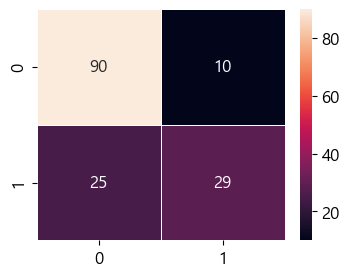

In [56]:
plt.figure(figsize = (4, 3))
sb.heatmap(conf_mat, annot = True, linewidths=.5)
plt.show()

- ConfusionMatrixDisplay 사용

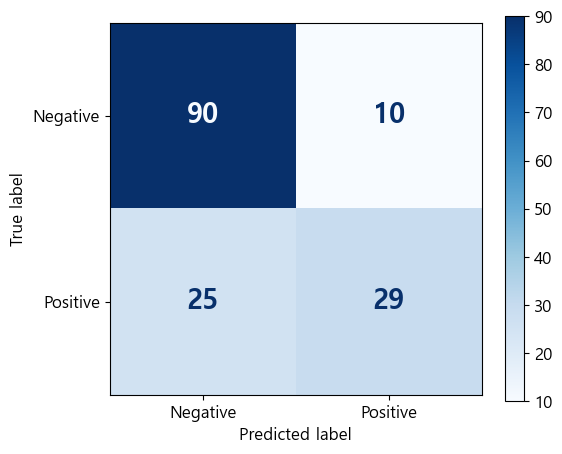

In [57]:
plt.figure(figsize = (6, 5), dpi = 100)
ax = plt.gca()

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels = ["Negative", "Positive"], cmap = plt.cm.Blues, text_kw = {'fontsize' : 20, 'weight' : 'bold'}, ax = ax
)
plt.show()

In [58]:
df = sb.load_dataset('titanic')

In [59]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [61]:
df.drop(['alive', 'deck'], axis = 1, inplace = True)

In [62]:
pp3 = YjkPreprocessor()
pp3.set_strategy(outline = None, null = 'median')

아래와 같이 처리합니다.
+-------------+---------------+
| 범주        | 처리방법      |
|-------------+---------------|
| 이상치 처리 | 처리하지 않음 |
| 결측치 처리 | 중앙값 대체   |
| 스케일러    | 표준화        |
| 인코딩      | 원핫인코딩    |
+-------------+---------------+


In [63]:
X = df.copy()
Y = X.pop('survived')

In [64]:
X_p = pp3.fit_transform(X)

데이터프레임 크기 : (891, 12)

[열별 결측치 개수]
+-------------+-------------+
| 열명        |   결측치 수 |
|-------------+-------------|
| age         |         177 |
| embarked    |           2 |
| embark_town |           2 |
+-------------+-------------+

연속형 데이터 컬럼 : ['pclass', 'age', 'sibsp', 'parch', 'fare'], 총 5개
명목형 데이터 컬럼 : ['sex', 'embarked', 'class', 'who', 'embark_town'], 총 5개
기타 데이터 컬럼 : ['adult_male', 'alone'], 총 2개


In [65]:
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [66]:
model = my_logistic_classification(x_train, y_train, x_test, y_test)

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
| 13 |     1 | l2        |          0.824387 |
|  9 |   0.1 | l2        |          0.820191 |
|  3 | 0.001 |           |          0.820162 |
|  7 |  0.01 |           |          0.820162 |
| 11 |   0.1 |           |          0.820162 |
| 15 |     1 |           |          0.820162 |
| 17 |    10 | l2        |          0.820162 |
| 19 |    10 |           |          0.820162 |
| 21 |   100 | l2        |          0.820162 |
| 23 |   100 |           |          0.820162 |
|  5 |  0.01 | l2        |          0.804757 |
|  1 | 0.001 | l2        |          0.643268 |
+----+-------+-----------+-------------------+



In [67]:
model.score(x_train, y_train), model.score(x_test, y_test)

(0.8286516853932584, 0.8100558659217877)

In [68]:
c_mat = confusion_matrix(y_test, model.predict(x_test))

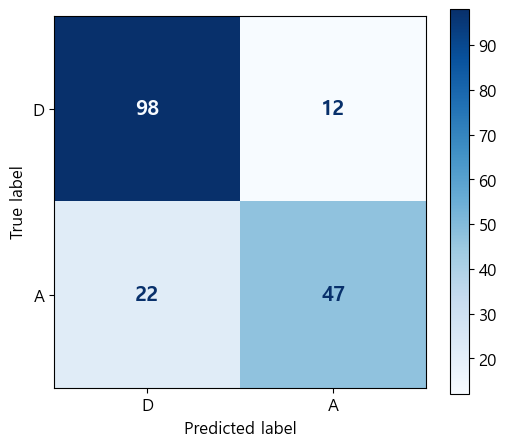

In [69]:
plt.figure(figsize = (6, 5), dpi = 100)
ax = plt.gca()

ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, ax = ax, cmap = plt.cm.Blues, text_kw = {'fontsize' : 15, 'weight' : 'bold'}, display_labels = ['D', 'A'])
plt.show()

In [70]:
yjk_confusion_matrix_metrics(c_mat)

,값
정확도,0.810056
정밀도,0.796610
재현율,0.681159
위양성율,0.109091
특이성,0.890909
F1 Score,0.734375


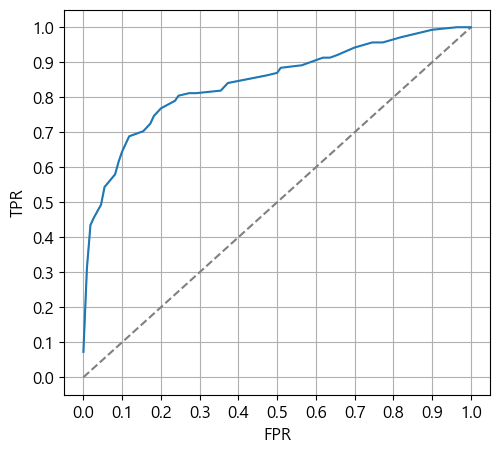

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
plt.figure(figsize = (5.5, 5))
sb.lineplot(x = [0, 1], y = [0, 1], color = 'gray', linestyle = '--')
sb.lineplot(x = fpr, y = tpr, ci = 0)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.show()

In [72]:
roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

0.8432806324110672

- MCLP 알고리즘 : 지리정보에 대한 군집화 알고리즘
  - 입지선정 (CCTV, 스타벅스 등)에 쓰이며 군집화 알고리즘 자체는 KMeans가 아닌 자체적인 알고리즘을 보유, 분류분석에 해당됨
  - 다수의 군집 사이의 교집합을 구하는데 쓰임